# PV177: Experimental Data Modelling

## Aleš Křenek, autumn 2020

# Learning by experience

* https://www.youtube.com/watch?v=N_MAKF4CbDo
* The wolf chases the hare along a Moscow "проспект"
* Both wear smart wathches, we know their position
* Precision of both time and position is not perfect
* **What is the speed of the hare?**



In [2]:
import numpy as np
import matplotlib.pyplot as plt

th=np.loadtxt('hare.txt')
t_hare = th.T[0]
x_hare = th.T[1]

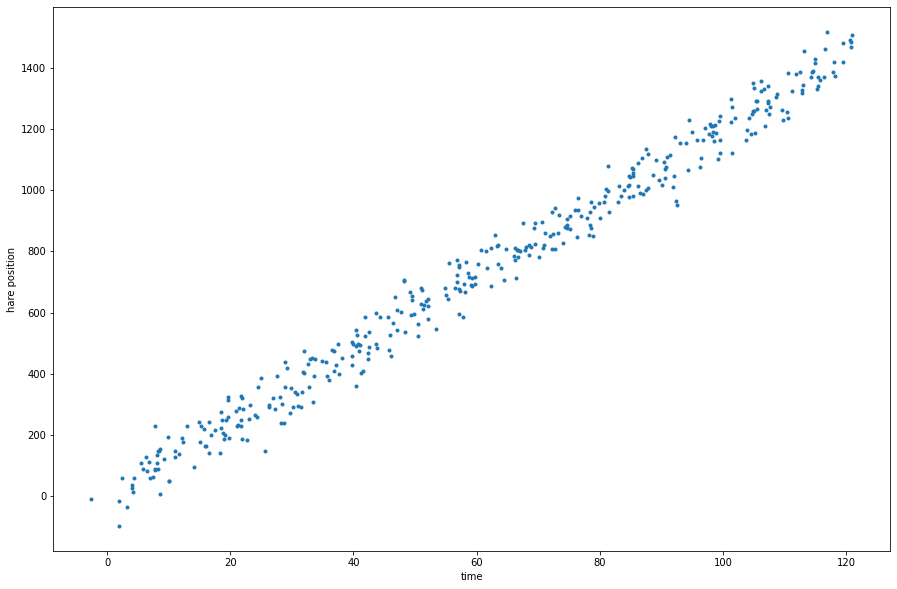

In [3]:
plt.figure(figsize=(15,10))
plt.scatter(t_hare,x_hare,marker='.')
plt.xlabel('time')
plt.ylabel('hare position')
plt.show()

In [4]:

def plt_lin_reg(time,measure,model,xlabel='time',ylabel='position'):
    plt.figure(figsize=(15,10))
    plt.scatter(time,measure,marker='.')
    plt.plot(time,model,c='red')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

**Download "hare.txt" and try something better than guessing**

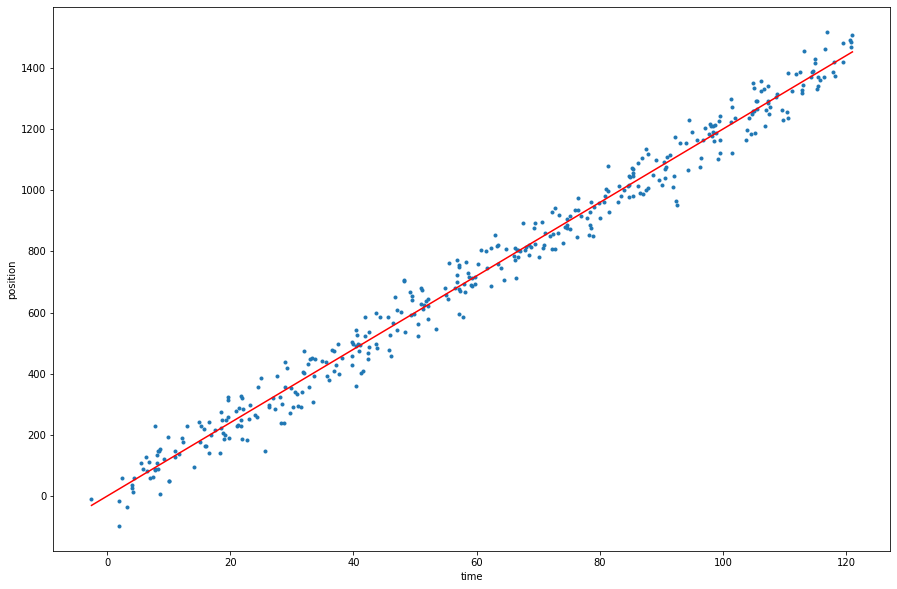

In [5]:
# magic
v = 12.
plt_lin_reg(t_hare,x_hare,t_hare*v)

# Linear regression and least squares

* minimize the sum of squares of difference between real and expected datapoints
* (more theory why it works will follow)

$$ r = \sum \left(vt_i - x_i\right)^2 $$

$$ \qquad \frac{dr}{dv} = \sum 2 \left(vt_i - x_i\right) t_i = 2 v \sum t_i^2 - 2\sum x_it_i$$

$$ 0 = \frac{dr}{dv} \qquad v = \frac{\sum x_it_i}{\sum t_i^2}$$

v =  11.991992113042139


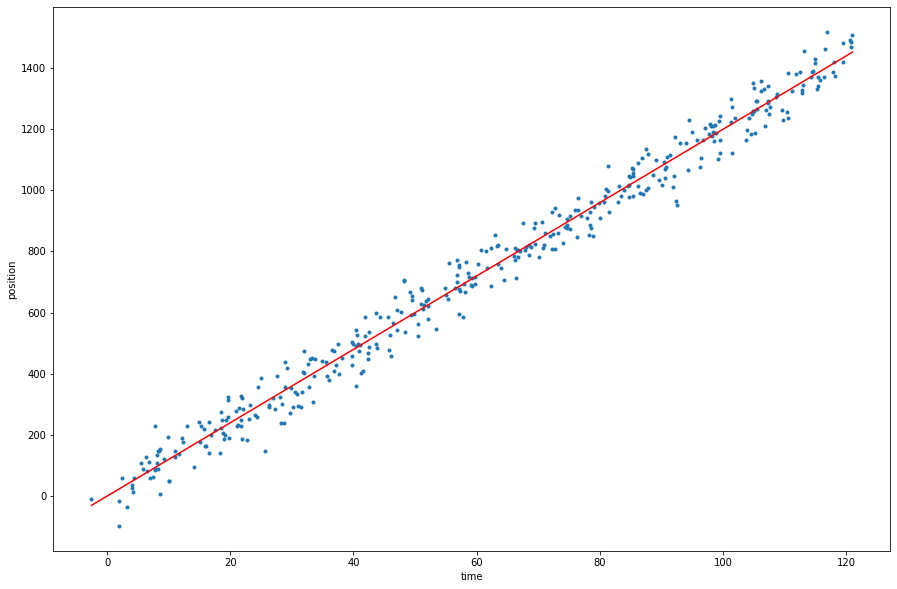

In [6]:
v = np.sum(x_hare*t_hare) / np.sum(t_hare**2)
print("v = ",v)
x_mod_hare=t_hare*v
plt_lin_reg(t_hare,x_hare,x_mod_hare)

# Model with parameters

* Experiment yields _measurements_ $y_i$ taken in points $x_i$
  * $x$ can be any quantity -- time, location, voltage, ...
  * both $x$ and $y$ can be vectors
* Behaviour of the system is described by a model $y = M(x)$
* The model depens on _parameters_ $a_i$, i.e.
$$ y = M(x,a_1,a_2,\dots,a_M) $$
* We look for such parameters $a_i$ that $M$ gives the best fit of experimental data
  * typically, the "best fit" means minimizing sum of squares of the error

# What is the best fit?

* Assume normal distribution of measurement error with $\sigma$ and some tolerance $\delta y$
* Given paramaters $a_i$, what is the probability of measurements $(x_i,y_i)$ occuring simultaneously?
$$
\prod_{i=1}^N e^{-\frac12\left(\frac{y_i-M(x_i)}\sigma\right)^2}\delta y
$$
* This is the _likelihood_ of $a_i$ set; it is maximized by minimizing the negative logarithm 
$$
\frac1{2\sigma^2}\left(\sum_{i=1}^N(y_i-M(x_i))^2\right) - N \ln\delta y
$$
where $N, \sigma$ and $\delta y$ are constant, hence irrelevant


# How good is the model?

* Linear (or more complex) regression virtually always succeeds
* To what extent the model reflects the data?
* **Download "wolves.txt" and determine wolf's speed with the same linear regression**
  * pick the first and second column of the file only

In [7]:
def plt_hare_wolf(th,hare,tw,wolf):
    plt.figure(figsize=(15,10))
    plt.scatter(th,hare,c='green',label='hare')
    plt.scatter(tw,wolf,c='red',label='wolf')
    plt.xlabel('time')
    plt.ylabel('position')
    plt.legend()

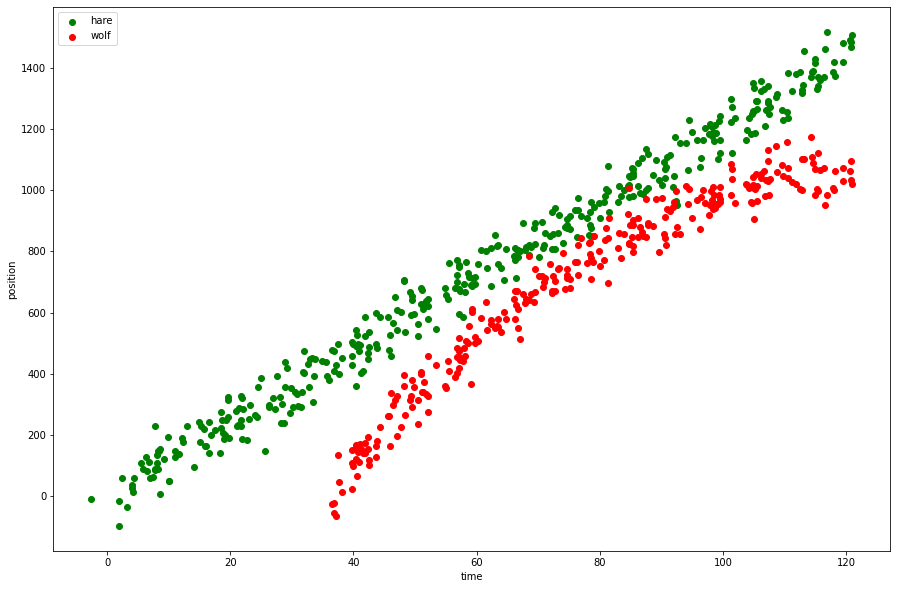

In [8]:
txw=np.loadtxt('wolves.txt')
t_wolf = txw.T[0]
x_wolf = txw.T[1]
wolves = np.delete(txw,0,axis=1)
   
plt_hare_wolf(t_hare,x_hare,t_wolf,x_wolf)
plt.show()

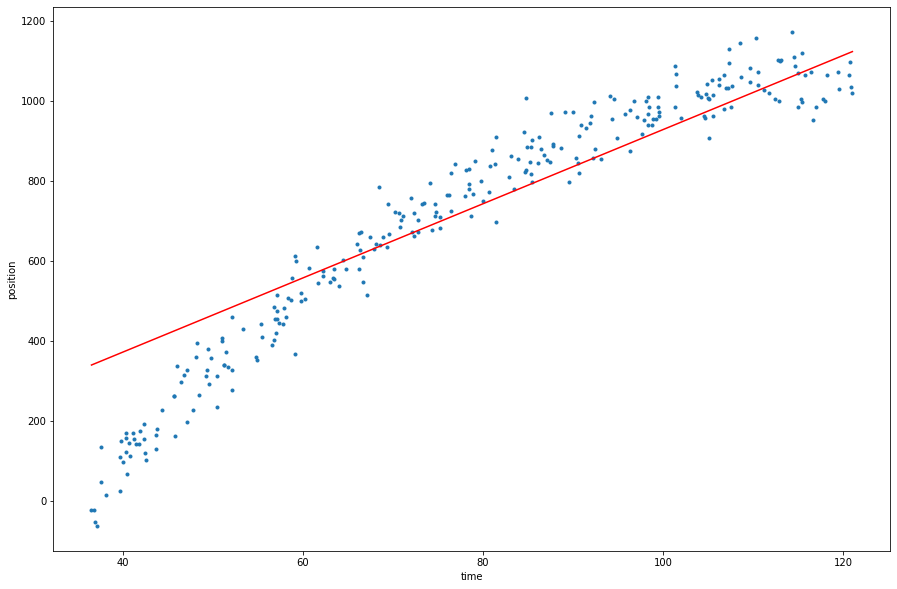

In [9]:
vw = np.sum(x_wolf*t_wolf) / np.sum(t_wolf**2)
x_mod_wolf=t_wolf*vw
plt_lin_reg(t_wolf,x_wolf,x_mod_wolf)

# How good is the model?

* Plot the graph and assess intuitively -- "chi by eye"
* ... or do something more exact -- _goodness of fit_
* Total sum of squares
$$ SS_{tot}=\sum (y_i - \bar y)^2 $$
* Resitual sum of squares 
$$ SS_{res} = \sum (y_i - M(x_i))^2 $$
* _Coeffitient of determination_
$$ R^2 = 1 - \frac{SS_{res}}{SS_{tot}} $$
* Intuitively: How much variance in the data the model explains?
  * $R^2 = 1$ -- the model is perfect
  * $R^2 = 0$ -- the model is not better than expecting average value of $y$
  * $R^2 < 0$ or $R^2 > 1$ -- the model is even worse than expecting the average
* **Compute $R^2$ for both hare and wolf**


In [10]:
def r2(x,y,f):
    mean = np.sum(y) / y.shape
    yres = y - mean
    s_tot = np.sum(yres * yres)
    res = y - f
    s_res = np.sum(res * res)
    r2 = 1 - s_res/s_tot
    return r2

In [11]:
r2(t_hare,x_hare,x_mod_hare)

0.9845057467560643

In [12]:
r2(t_wolf,x_wolf,x_mod_wolf)

0.8523901900706369

# All models are wrong

* Common aphorism in statistic, "All models are wrong, but some are useful" in full
  * Originally in George Box's paper in JASA, 1976
* Real world is far more complex than mathematical models we will ever build
* There are famous positive examples, though:
  * Newton mechanics -- superceeded by Einstein but it still explains a lot
  * Ideal gas equations -- drive most of industry, though none has ever seen ideal gas
  * ... and many more
* Be humble, not nihilist!

# Bettter wolf model
* Any suggestions?

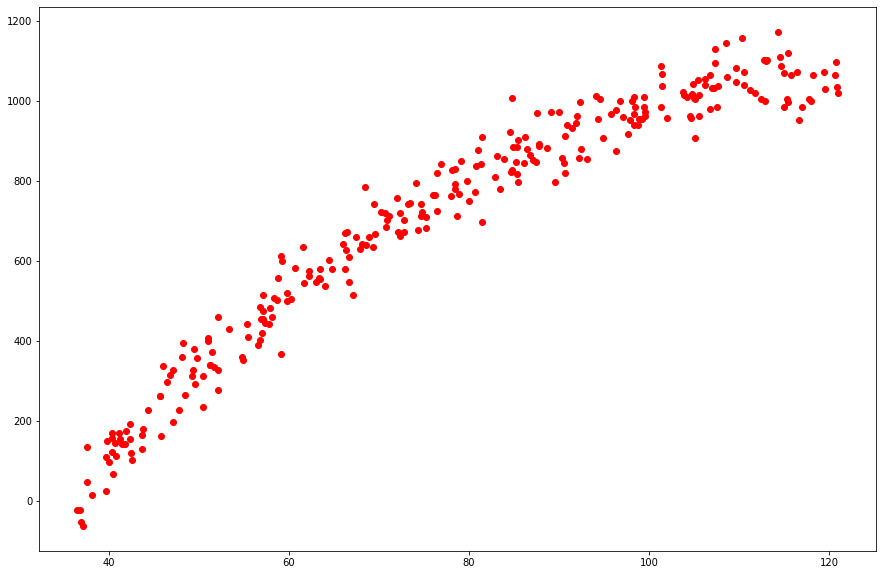

In [13]:
plt.figure(figsize=(15,10))
plt.scatter(t_wolf,x_wolf,c='red')
plt.show()

# Better wolf model
* It looks like half-parabolla upside down
$$ x = at^2 + bt + c $$
with unknown $a,b,c$

In [14]:
def wolf(t,a,b,c):
    return a*t*t + b*t + c


* Least squares -- solve overdetermined system of equations
$$ A x = b $$
where $x$ is the vector of parameters and $A$ encodes the model, and $b$ are measurements
* **Search manual of scipy.linalg.lstsq, apply to our wolf data**

In [22]:
t2 = t_wolf**2
ones = np.full(t_wolf.shape,1.)
A = np.stack((t2,t_wolf,ones), axis=1)

[-1.42162825e-01  3.46609392e+01 -1.05493119e+03]


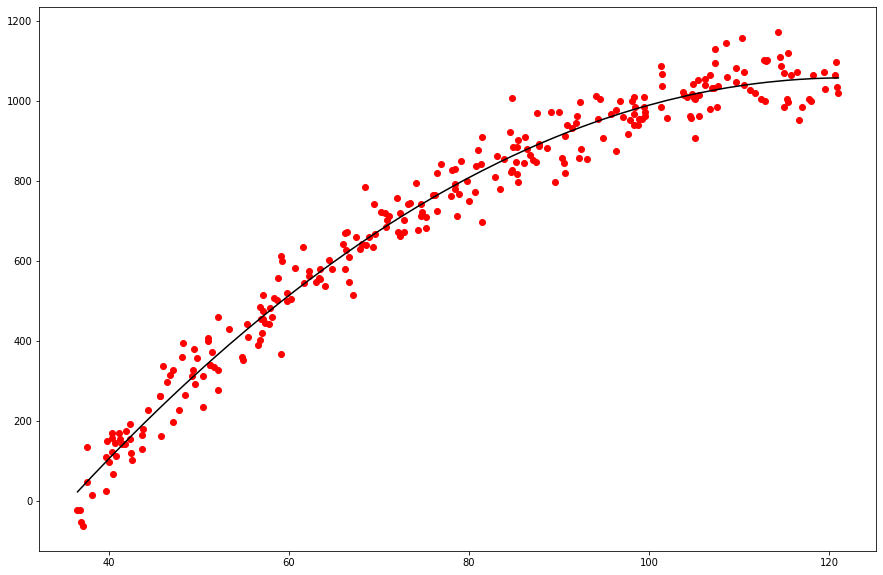

In [16]:
from scipy.linalg import lstsq

par,_,_,_ = lstsq(A,x_wolf)
print(par)

plt.figure(figsize=(15,10))
plt.scatter(t_wolf,x_wolf,c='red')
x_wolf_mod2 = wolf(t_wolf,*par)
plt.plot(t_wolf,x_wolf_mod2,c='black')
plt.show()

In [17]:
r2(t_wolf,x_wolf,x_wolf_mod2)

0.9749150909420109

# Statistical meaning

* What of the following can we infer from the data?
  * The hare runs at the speed 12 m/s
  * The hare was running 12 m/s this time
  * The wolf needs at least 37 s to smoke a cigarette
  * The initial wolf speed is 25 m/s
  * Smoking affects long run performance
  * Wolf's speed decayed apparently this time
  
* Compare with the "vitamins increase IQ" example

# Lack-of-fit sum of squares 
* Repeated experiment is necessary 
* Then its possible to distinguish _lack of fit_ error from _pure_ error
* With linear least squares, those vectors are orthogonal, hence
$$ \sum_{i,j}(y_{ij} - \hat y_i)^2 = \sum_{i,j}(y_{ij}-\bar y_i)^2 + m \sum_i (\bar y_i - \hat y_i)^2 $$
where $i$ runs in the range of independent variable, $y_{ij}$ are individual observations, $\hat y_i = M(x_i)$ modeled values, and $\bar y_i$ local averages over $m$ samples at specific $i$
* Then we can compute _f-statistics_ of the model
$$ F = \frac{m \left(\sum_i (\bar y_i - \hat y_i)^2\right) / (n-k)}{\left(\sum_{i,j}(y_{ij}-\bar y_i)^2\right)/(mn - n)} $$
where $k$ is the number of fitted parameters, i.e. ratio of these errors compensated by the degrees of freedom

# Lack-of-fit sum of squares

* Statistical evidence on the hypotheses
  * $H_0$: the model is correct
  * $H_A$: the model is not correct
* Usual $p$-value meaning: probability of getting this $F$ or worse, if $H_0$ holds
* Computed as $1-cdf(F,n-k,mn-n)$ where $cdf$ is cummulative $F$ function
* $p<\alpha$ means we reject $H_0$, hence the model is incorrect


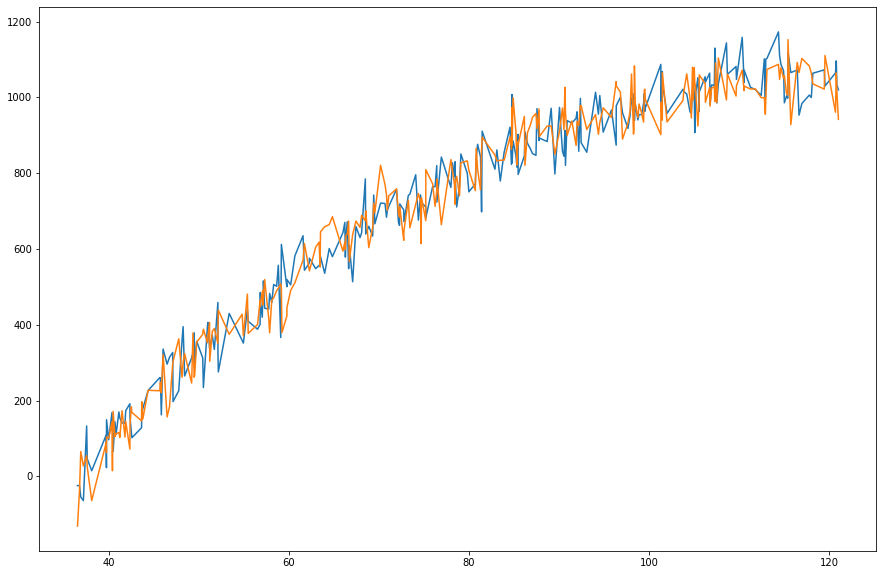

In [18]:
plt.figure(figsize=(15,10))
plt.plot(t_wolf,wolves[:,0])
plt.plot(t_wolf,wolves[:,2])
#plt.plot(t_wolf,wolves[:,17])
#plt.plot(t_wolf,wolves[:,49])
plt.show()

In [19]:
from scipy.stats import f

samples,repeats = wolves.shape

sample_mean = np.sum(wolves,axis=1)/repeats

Arep = np.tile(A,(repeats,1))
bflat = np.reshape(wolves,samples*repeats,order='F')

par,_,_,_ = lstsq(Arep,bflat)

wolf_mod3 = wolf(t_wolf,*par)
mod_mean = wolf_mod3 - sample_mean
lack = repeats * np.sum(mod_mean**2)

m = np.tile(np.reshape(sample_mean,(samples,1)),repeats)
wolf_mean = wolves - m
pure = np.sum(wolf_mean * wolf_mean)

d1 = samples-3
d2 = samples*repeats - samples
wolf_f = (lack / d1) / (pure / d2)
print("wolf", wolf_f,d1,d2)
print("p-value",1.-f.cdf(wolf_f,d1,d2))

#plt.plot(t_wolf,sample_mean)
#plt.plot(t_wolf,wolf_mod3)
#plt.plot(t_wolf,mod_mean)
#plt.show()

wolf 1.0011360237887807 276 1116
p-value 0.48760784984397054


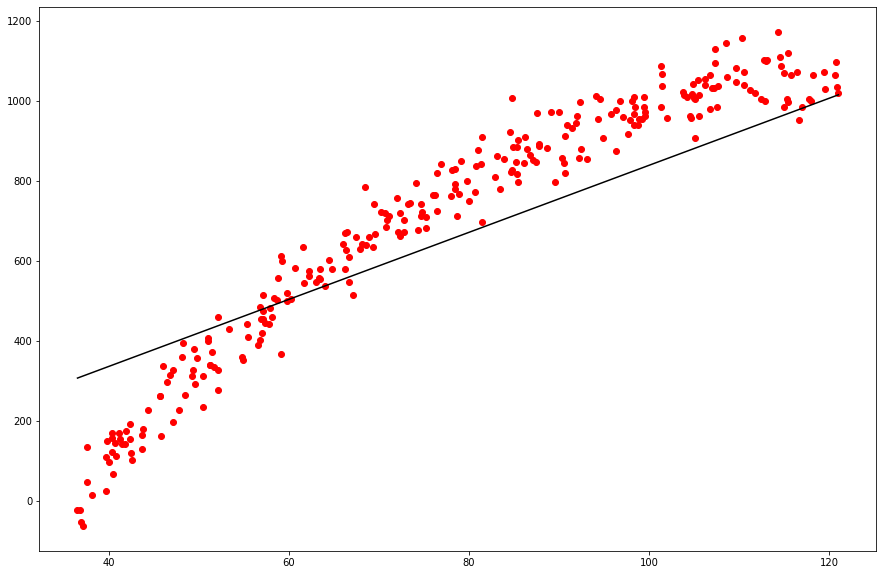

In [20]:
twrep = np.repeat(t_wolf,repeats)
vw = np.sum(bflat*twrep) / np.sum(twrep**2)

wolf_mod_lin = t_wolf*vw
plt.figure(figsize=(15,10))
plt.scatter(t_wolf,wolves[:,0],c='red')
plt.plot(t_wolf,wolf_mod_lin,c='black')
plt.show()

In [21]:
mod_mean_lin = wolf_mod_lin - sample_mean
lack_lin = repeats * np.sum(mod_mean_lin**2)

d1_lin = samples-1

wolf_f_lin = (lack_lin/d1_lin) / (pure/d2)
print("wolf lin", wolf_f_lin,d1_lin,d2)
print("p-value",1-f.cdf(wolf_f_lin,d1_lin,d2))


wolf lin 36.61474451759997 278 1116
p-value 1.1102230246251565e-16


# Try it yourself

* Split into small teams, invent some scenario, prepare your "experimental" data
* Let the others come with a model and assess its goodness of fit
* Keep the models linear (will be discussed later why)
$$ M(x,\alpha_1,\alpha_2,\dots) = \sum_i \alpha_i f_i(x) $$